<a href="https://colab.research.google.com/github/zuhairnasir/Project_2/blob/main/ev_charging_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

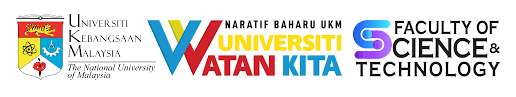
# **Project 2**
>
### **STQD6014 Data Science Semester 1 2024/2024**
>
*Muhammad Zuhair Afham Bin Mohd Nasir (P153944)*


**Title:** *Analysis of Electric Vehicle Charging Patterns for Sustainable Transportation in the United States*

>
>
# **Content Outline**
1. [**Introduction**](#intro)
    * [Purpose](#purpose): Overview of the project
    * [Dataset](#dataset): Dataset used
    * [Objective](#objective): Objective of the analysis


2. [**Problem Statement**](#problem)


3. [**Results and Discussion**](#result)
    * [Analysis of Charging Duration](#charging-duration): Distribution and insights
    * [Charger Type Utilization](#charger-type): Popularity and usage patterns
    * [Charging Station Demand by Location](#location-demand): Identifying high demand areas
    * [Cost Variation Across Charger Types](#cost-variation): Relationship between cost and charger type
    * [Cost and Energy Consumption](#cost-energy): Correlation and optimization
    * [Correlation Analysis](#correlation): Visualizing relationships between variables


4. [**Conclusion**](#summary)

5. [**References**](#reference)

# **1. Introduction** <a name='intro'></a>


## **Purpose** <a name='purpose'></a>

**Electric vehicles (EVs)** are at the forefront of sustainable transportation and green energy. The purpose of this project is to analyze electric vehicle (EV) charging patterns to understand user behavior, charging station utilization and temporal trends. This analysis aims to identify patterns and trends that can inform the development of efficient and user-friendly EV charging infrastructure by leveraging data on charging durations, station types, and locations. The findings will help improve charging station placement, improve operational efficiency, and support the growing adoption of electric vehicles as part of a sustainable transportation ecosystem for a greener future.
>
>
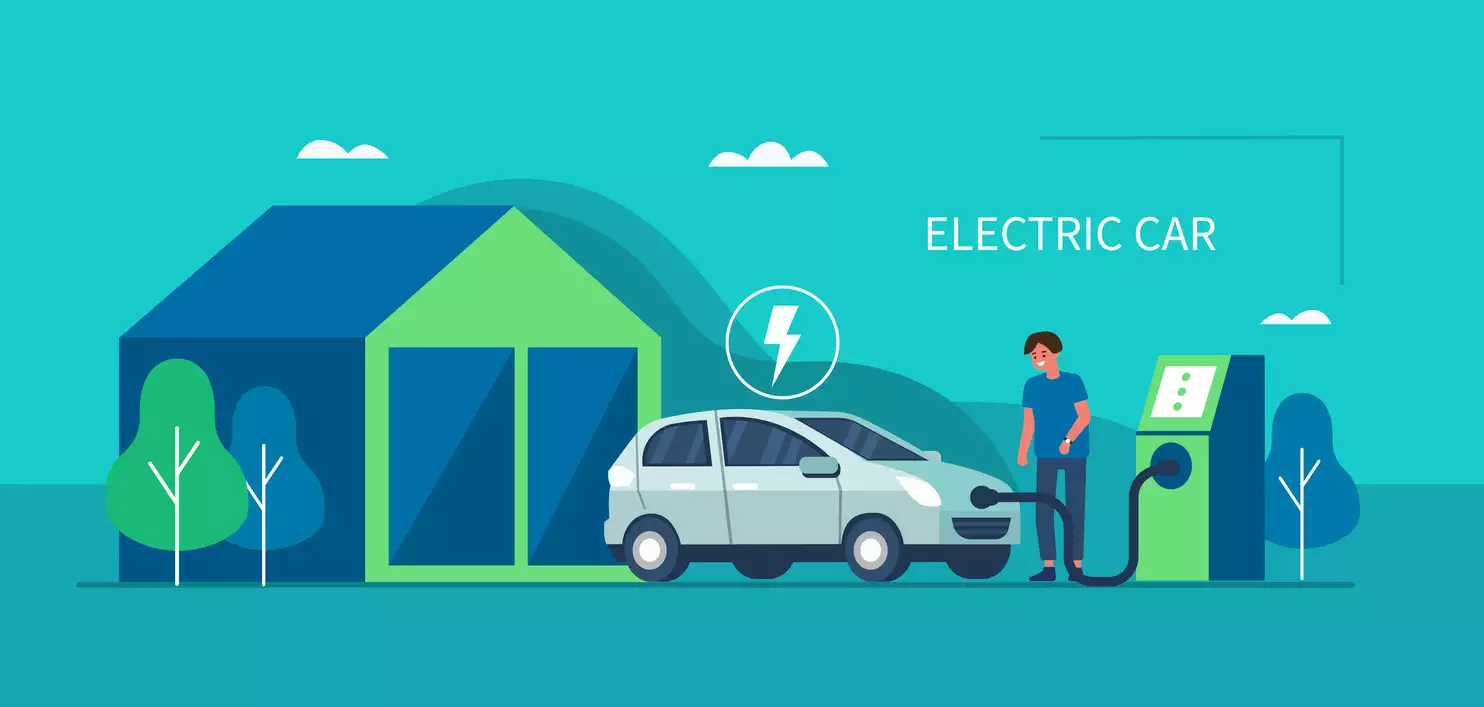

## **Dataset** <a name='dataset'></a>
This analysis uses a dataset from [Kaggle](https://www.kaggle.com/datasets/valakhorasani/electric-vehicle-charging-patterns/data) that provides detailed information about EV charging patterns. It includes details such as:
- Types of charging station.
- Charging session durations.
- Locations of charging station.
- Daily and seasonal trends in EV charging usage.

## **Objective** <a name='objective'></a>
The primary objectives of this analysis are:
* To identify charging behavior patterns.
* To determine the most frequently used charger types.
* To optimize the best charging station locations.
* To analyze correlations between charging costs and charging type.
* To explore the relationship between cost and energy consumption.
* To support the development of a sustainable EV charging infrastructure to meet the growing demand for electric vehicles.

---

# **2. Problem Statements** <a name='problem'></a>
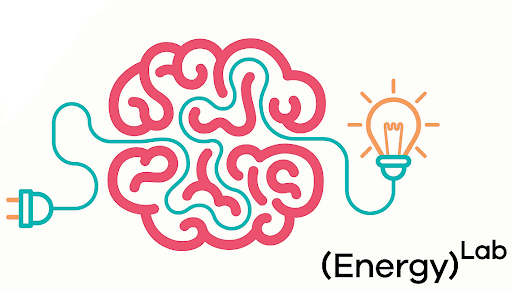
1. What are the key patterns in EV charging behavior?
2. Which types of charging stations are most frequntly used?
3. How can the data be used to determine the best locations for charging stations.
4. What is the distribution of charging costs, and how does it vary by charger type?
5. What is the relationship between charging cost and energy consumed at charging stations?
6. How can these insights support the growing adoption of electric vehicles and contribute to the development of a sustainable transportation ecosystem?

### Import library and load the dataset

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load ev dataset
data_ev = pd.read_csv('/content/drive/MyDrive/Data_Science/Project_2/ev_charging_patterns.csv')

In [4]:
# display the first 5 rows of the dataset
data_ev.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,01/01/2024 0:00,01/01/2024 0:39,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,01/01/2024 1:00,01/01/2024 3:01,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,01/01/2024 2:00,01/01/2024 4:48,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,01/01/2024 3:00,01/01/2024 6:42,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,01/01/2024 4:00,01/01/2024 5:46,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


### Data Cleaning

In [5]:
# check missing values
print(data_ev.isnull().sum())

User ID                                      0
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
dtype: int64


The output shows the number of missing values in each column. In the given dataset, columns such as **Energy Consumed (kWh)**, **Charging Rate (kW)**, and **Distance Driven (since last charge) (km)** have 66 missing values each that need to be removed while all other columns have complete data.

In [7]:
# remove unnecessary columns
columns_to_drop=['User ID','Vehicle Model', 'Charging Start Time', 'Charging End Time', 'Distance Driven (since last charge) (km)','Temperature (°C)', 'Vehicle Age (years)', 'User Type']
data_ev.drop(columns=[col for col in columns_to_drop if col in data_ev.columns], inplace=True)
print(data_ev.columns)

Index(['Battery Capacity (kWh)', 'Charging Station ID',
       'Charging Station Location', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'Time of Day', 'Day of Week',
       'State of Charge (Start %)', 'State of Charge (End %)', 'Charger Type'],
      dtype='object')


The decision to remove specific columns from the dataset was based on their relevance to the core objectives of the analysis. Some columns, while potentially useful in other contexts, did not contribute meaningfully to understanding EV charging patterns. For example, the User ID column was removed because it is unique to each user and does not offer generalizable insights into overall charging behavior. Similarly, Vehicle Model was omitted since the focus of this analysis is on charging behavior rather than vehicle-specific performance. While certain vehicle models might have different charging efficiencies, this distinction would require a more detailed examination that falls outside the scope of this study.

Another set of columns removed includes Charging Start Time and Charging End Time. While timestamps are valuable for tracking individual charging sessions, the dataset already includes derived features such as Time of Day and Day of Week, which provide more structured and interpretable insights into temporal charging patterns. By focusing on these derived features, we can maintain the interpretability of the dataset without unnecessary complexity. The Distance Driven (since last charge) (km) column, although relevant in assessing vehicle usage, had a significant number of missing values. Given that this study is centered on charging behaviors rather than driving patterns, it was determined that its inclusion would not add substantial value to the analysis.

Environmental factors, such as Temperature (°C), were also excluded from the dataset. While temperature can influence battery performance and efficiency, the dataset lacks sufficient granularity to conduct a meaningful analysis of temperature effects. Similarly, Vehicle Age (years) was removed since the study does not focus on the degradation of batteries over time. Understanding how vehicle age affects charging behavior would require a more longitudinal approach with additional data sources. Finally, the User Type column was removed because the dataset does not clarify distinct categories of users, making it difficult to derive actionable insights from this variable.

By removing these columns, the dataset is streamlined for more focused analysis, ensuring that only the most relevant features are retained. This allows for better efficiency in processing, visualization, and interpretation, ultimately leading to more precise and actionable insights regarding EV charging behaviors.

In [8]:
# calculate null values for Energy Consumed (kWh)
data_ev['Energy Consumed (kWh)'] = data_ev['Energy Consumed (kWh)'].fillna(
    data_ev['Battery Capacity (kWh)'] * (data_ev['State of Charge (End %)'] - data_ev['State of Charge (Start %)']) / 100)

In [9]:
# calculate null values for Charging Rate (kW)
data_ev['Charging Rate (kW)'] = data_ev['Charging Rate (kW)'].fillna(
    data_ev['Energy Consumed (kWh)'] / data_ev['Charging Duration (hours)'])

In [10]:
# check missing values again
print(data_ev.isnull().sum())

Battery Capacity (kWh)       0
Charging Station ID          0
Charging Station Location    0
Energy Consumed (kWh)        0
Charging Duration (hours)    0
Charging Rate (kW)           0
Charging Cost (USD)          0
Time of Day                  0
Day of Week                  0
State of Charge (Start %)    0
State of Charge (End %)      0
Charger Type                 0
dtype: int64


In [11]:
# convert data types for date
if 'date' in data_ev.columns:
    data_ev['date'] = pd.to_datetime(data_ev['date'], errors='coerce')

In [12]:
# check data type
data_ev.dtypes

,0
Battery Capacity (kWh),float64
Charging Station ID,object
Charging Station Location,object
Energy Consumed (kWh),float64
Charging Duration (hours),float64
Charging Rate (kW),float64
Charging Cost (USD),float64
Time of Day,object
Day of Week,object
State of Charge (Start %),float64


In [13]:
# remove invalid values such negative or zero
data_ev = data_ev.loc[(data_ev['Charging Duration (hours)'] > 0)]

if 'sessions' in data_ev.columns:
    data = data_ev[data_ev['sessions'] > 0]

In [14]:
# create new columns to extract day, month, and year from the 'date' column
data_ev['day'] = pd.to_datetime(data_ev.get('date', pd.Series(dtype='datetime64[ns]')), errors='coerce').dt.day
data_ev['month'] = pd.to_datetime(data_ev.get('date', pd.Series(dtype='datetime64[ns]')), errors='coerce').dt.month
data_ev['year'] = pd.to_datetime(data_ev.get('date', pd.Series(dtype='datetime64[ns]')), errors='coerce').dt.year

In [15]:
# show data info
print(data_ev.info())
print(data_ev.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1320 entries, 0 to 1319
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Battery Capacity (kWh)     1320 non-null   float64
 1   Charging Station ID        1320 non-null   object 
 2   Charging Station Location  1320 non-null   object 
 3   Energy Consumed (kWh)      1320 non-null   float64
 4   Charging Duration (hours)  1320 non-null   float64
 5   Charging Rate (kW)         1320 non-null   float64
 6   Charging Cost (USD)        1320 non-null   float64
 7   Time of Day                1320 non-null   object 
 8   Day of Week                1320 non-null   object 
 9   State of Charge (Start %)  1320 non-null   float64
 10  State of Charge (End %)    1320 non-null   float64
 11  Charger Type               1320 non-null   object 
 12  day                        0 non-null      float64
 13  month                      0 non-null      float64
 1

# **3.0 Results and Discussion** <a name='result'></a>

### **3.1 Analysis of Charging Duration** <a name='charging-duration'></a>

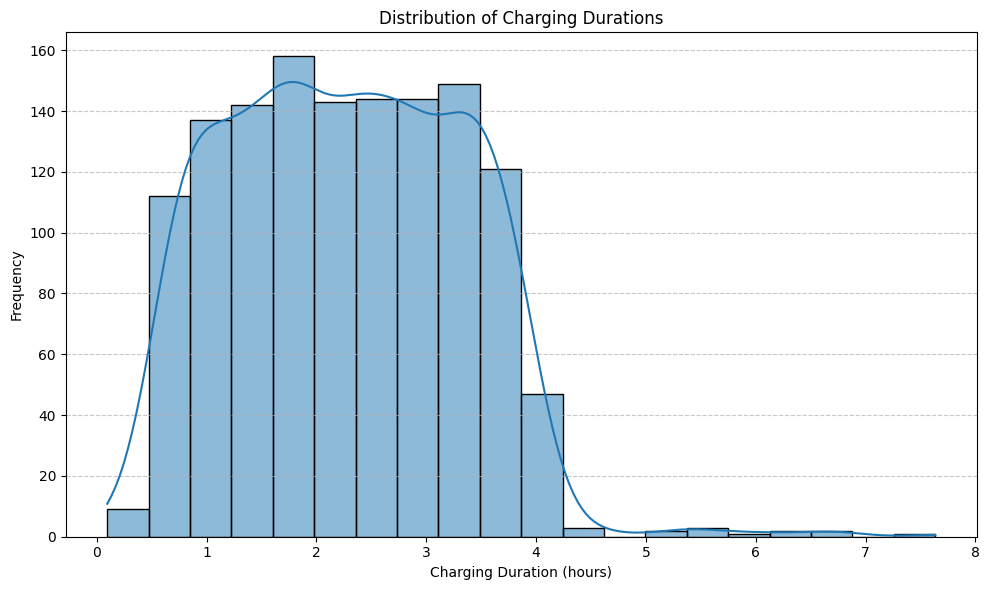

In [16]:
# 1. create plot for key patterns in EV Charging Behavior
plt.figure(figsize=(10, 6))
sns.histplot(data_ev['Charging Duration (hours)'], bins=20, kde=True)
plt.title('Distribution of Charging Durations')
plt.xlabel('Charging Duration (hours)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Explanation:**
>
The histogram of charging durations shows that most charging sessions fall between 1 and 4 hours with a peak slightly below 2 hours. This suggests that most EV owners prefer charging their vehicles for a medium duration within 2 hours rather than opting for extremely short or excessively long sessions.
>
One possible explanation for this pattern is the daily routines and lifestyles of EV users. Many people charge their vehicles during errands, work hours or while shopping where they have a few hours available to recharge their battery car. Additionally, some users might take advantage of overnight charging at residential stations where they leave their vehicles plugged in for a few hours before reaching a sufficient charge level. These behaviors highlight the growing need for convenient and accessible charging stations that cater to users who do not necessarily need a full battery recharge every time they plug in.
>
On the other hand, there is also a smaller group of users who engage in extended charging sessions which could indicate situations where vehicles are charged to full capacity. This is often seen in cases where users prepare for long trips or where they have no immediate access to another charging station which prompting them to maximize their charge before resuming travel. These extended charging sessions could also reflect users relying on Level 1 or Level 2 chargers which can deliver power at a slower rate that required more time to recharge the battery.
>
For summary, areas with high demand for shorter charging sessions may benefit from installing DC Fast Chargers which allow users to quickly recharge their vehicles and continue their journey with minimal downtime. Conversely, locations where longer charging durations are common such as residential areas, workplaces and long-term parking lots would be better suited for Level 2 chargers which provide a more cost-effective and sustainable solution for EV users who can afford to leave their vehicles plugged in for an extended period.
>

**Reference:**
>
Hardman, S., Jenn, A., Tal, G., & Axsen, J. (2018). *A review of consumer preferences of and interactions with electric vehicle charging infrastructure.* Transportation Research Part D: Transport and Environment, 62, 508-523. https://doi.org/10.1016/j.trd.2018.04.002

----

### **3.2 Charger Type Utilization** <a name='charger-type'></a>


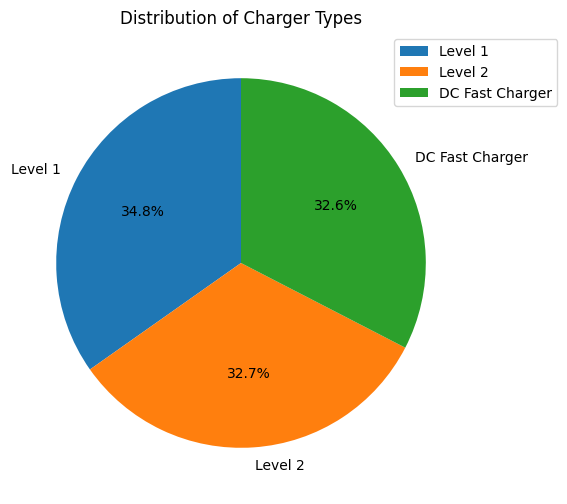

In [17]:
# 2. create pie chart for types of charging stations most frquently used
station_types = data_ev['Charger Type'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(station_types, labels=station_types.index, autopct='%1.1f%%', startangle=90,
        textprops={'fontsize': 10})
plt.legend(station_types.index, loc="upper right",bbox_to_anchor=(1.2, 1), fontsize=10)
plt.title('Distribution of Charger Types')
plt.show()


**Explanation:**
>
The distribution of charger types plays a crucial role in shaping the convenience and efficiency of electric vehicle (EV) charging infrastructure. The pie chart illustrates the utilization of three primary types of chargers which are Level 1, Level 2, and DC Fast Chargers. It reveals a relatively balanced distribution with **Level 1** chargers making up **34.8%**, **Level 2** chargers at **32.7%**, and **DC Fast Chargers** closely following at **32.6%**. While this suggests that all three types of chargers are essential for meeting diverse charging needs. The slightly higher proportion of Level 1 chargers indicates that many EV owners still rely on slower, home-based charging solutions while public charging options, including Level 2 and DC Fast Chargers, are nearly equal in usage.
>
Level 1 chargers are the most basic and widely available as they operate using a standard 120V household outlet and provide 2-5 kW of power. Despite their slow charging speed, often requiring 8 to 20 hours for a full charge, they are commonly used for home charging. Their widespread usage can be attributed to convenience, cost-effectiveness and the ability to charge overnight without requiring additional infrastructure. Many workplaces and residential buildings also provide Level 1 charging as a free or low-cost option. However, their long charging duration makes them impractical for public or high-demand situations.
>
On the other hand, Level 2 chargers offer a more efficient solution by operating on 240V power and delivering 7-22 kW, four to ten times faster than Level 1 chargers. These chargers are commonly found in workplaces, shopping centers, and public parking lots, providing a good balance between cost and efficiency. Their popularity stems from their suitability for both home and public charging as they do not require the expensive infrastructure upgrades needed for DC Fast Chargers. While Level 2 chargers significantly reduce charging time compared to Level 1, they still take a few hours to fully charge a vehicle making them less ideal for drivers in need of rapid recharging.
>
DC Fast Chargers also known as Level 3 chargers provide the fastest charging solution by delivering 50-350 kW of power which allowed EVs to charge from 20% to 80% in as little as 15 to 45 minutes. Despite their speed, they are the least common due to high installation and operational costs. Unlike Level 1 and Level 2 chargers, DC Fast Chargers require high-voltage infrastructure. Additionally, their high energy consumption results in higher charging costs for users. Consequently, they are primarily installed along highways, travel routes, and commercial areas where rapid charging is essential for long-distance travel. While their availability is limited compared to other charger types, DC Fast Chargers play a crucial role in reducing "range anxiety" and supporting the growing number of EV drivers who require quick recharging.
>
The relatively even distribution of charger types suggests that a well-balanced infrastructure is necessary to support the increasing adoption of EVs. Level 1 chargers are essential for home charging, Level 2 chargers are ideal for public and workplace use, and DC Fast Chargers provide rapid charging solutions for long trips. The presence of a significant number of Level 2 chargers highlights the growing expansion of public charging infrastructure which make EVs more practical for users who do not have access to home charging. However, the limited availability of DC Fast Chargers indicates the need for further investment in fast-charging networks to improve convenience and accessibility for high-mileage drivers.
>
**Reference:**

Nicholas, M., Hall, D., & Lutsey, N. (2019). *Quantifying the electric vehicle charging infrastructure gap across U.S. markets*. The International Council on Clean Transportation. https://theicct.org/publication/quantifying-the-electric-vehicle-charging-infrastructure-gap-across-u-s-markets/

----

### **3.3 Charging Station Demand by Location** <a name='location-demand'></a>

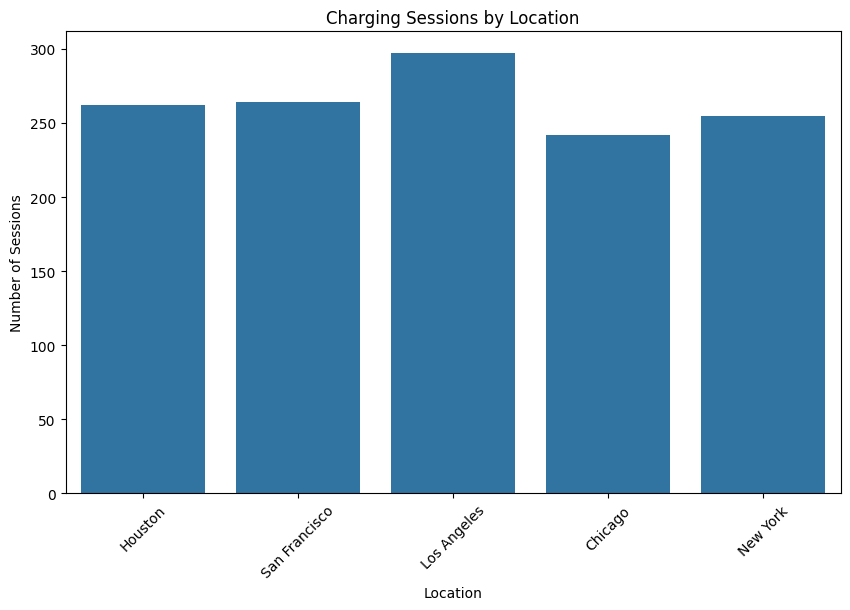

In [18]:
# 3. create bar plot for charging sessions by location
plt.figure(figsize=(10, 6))
sns.countplot(x='Charging Station Location', data=data_ev)
plt.title('Charging Sessions by Location')
plt.xlabel('Location')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)
plt.show()

**Explanation:**

The bar chart presents the demand for charging stations across different locations. From the visualization, it is shows that Los Angeles experiences the highest number of charging sessions with a greater reliance on electric vehicle (EV) infrastructure in this region. This could be attributed to the high EV adoption rate in California which has been a leader in promoting clean transportation through government incentives, policies, and widespread charging infrastructure.
>
Houston and San Francisco also show a significant number of charging sessions which may be driven by a combination of commuter behavior and the availability of charging stations. These cities are known for their urban density, long-distance commuters, and growing number of EV users. The demand in these areas indicates that EV owners frequently rely on public or semi-public charging points possibly due to limited at-home charging options for apartment residents or those without private garages.
>
Chicago exhibits a slightly lower number of charging sessions compared to the other cities. This may suggest that EV adoption is still growing in this region or that a higher proportion of users have access to home charging, reducing reliance on public infrastructure. Additionally, seasonal weather conditions might influence charging patterns as colder climates can impact battery efficiency and charging behavior.
>
New York showing a slightly lower demand than Los Angeles and San Francisco still maintains a considerable number of charging sessions. Given the city’s dense urban environment, many EV owners might lack access to home charging, leading to a higher dependency on public charging stations. The availability of fast chargers and the expansion of EV-friendly policies will likely shape future demand in this location.
>
In addition, high-demand areas such as Los Angeles and San Francisco may require additional fast-charging stations to accommodate increasing EV adoption, while emerging EV markets like Chicago could benefit from incentives that encourage infrastructure expansion.

>
**Reference:**

Nicholas, M., & Hall, D. (2018). *Lessons learned on early electric vehicle fast-charging deployments.* International Council on Clean Transportation. https://theicct.org/publication/lessons-learned-on-early-electric-vehicle-fast-charging-deployments/


----

### **3.4 Cost Variation Across Charger Types** <a name='cost-variation'></a>

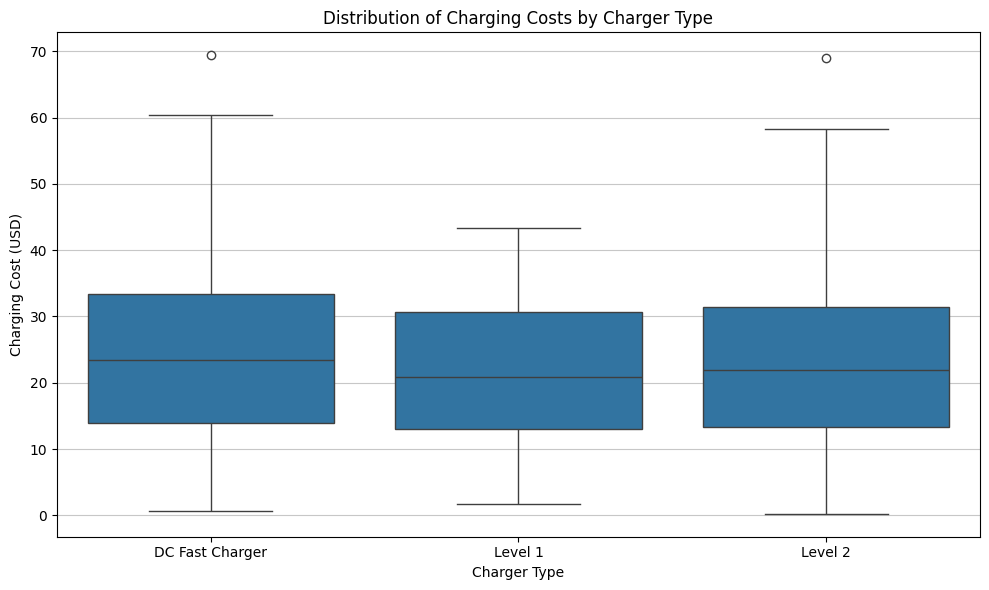

In [19]:
# 4. create box plot for the charging costs by charger type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Charger Type', y='Charging Cost (USD)', data=data_ev)
plt.title('Distribution of Charging Costs by Charger Type')
plt.xlabel('Charger Type')
plt.ylabel('Charging Cost (USD)')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

**Explanation:**
>
The box plot depicts the distribution of charging costs across different charger types. Among these, DC Fast Chargers show the highest median charging cost followed by Level 2 and then Level 1 chargers. This trend is expected as DC Fast Chargers deliver rapid charging at a premium price, which convenient yet costly option, whereas Level 1 chargers which rely on standard household outlets tend to be the most affordable but slowest alternative.
>
The interquartile range (IQR) represents the middle 50% of charging costs is widest for DC Fast Chargers. Level 1 and Level 2 chargers also display moderate fluctuations in cost likely due to factors such as differences in electricity tariffs, provider fees, and regional pricing models. The presence of outliers in the data indicates instances where users experience significantly higher or lower costs compared to the typical range.
>
A closer look at the outliers reveals that DC Fast Chargers have two extreme cases, with charging costs exceeding 70 USD. While Level 2 chargers also have one significant outlier near to 70 USD. These suggest that while the majority of charging sessions fall within a predictable price range, some stations impose significantly higher fees, likely due to dynamic pricing mechanisms, extended charging durations, or limited access to alternative charging options.
>
For analysis, the high pricing inconsistency in DC Fast Charging may discourage users from relying on it as a primary charging method which reinforced the need for affordable and accessible Level 2 charging stations, especially in public and residential areas. Additionally, regulatory measures could be implemented to control extreme pricing cases and ensure fair access to charging facilities.

>
**Reference:**
>
Qmerit. (2023, July 10). *Comparing long-term cost analysis of EV home charging vs. public charging.* Qmerit. https://qmerit.com/blog/comparing-long-term-cost-analysis-of-ev-home-charging-vs-public-charging/

----

### **3.5 Charging Cost and Energy Consumed** <a name='cost-energy'></a>

R² value for DC Fast Charger: 0.01
R² value for Level 1: 0.00
R² value for Level 2: 0.00


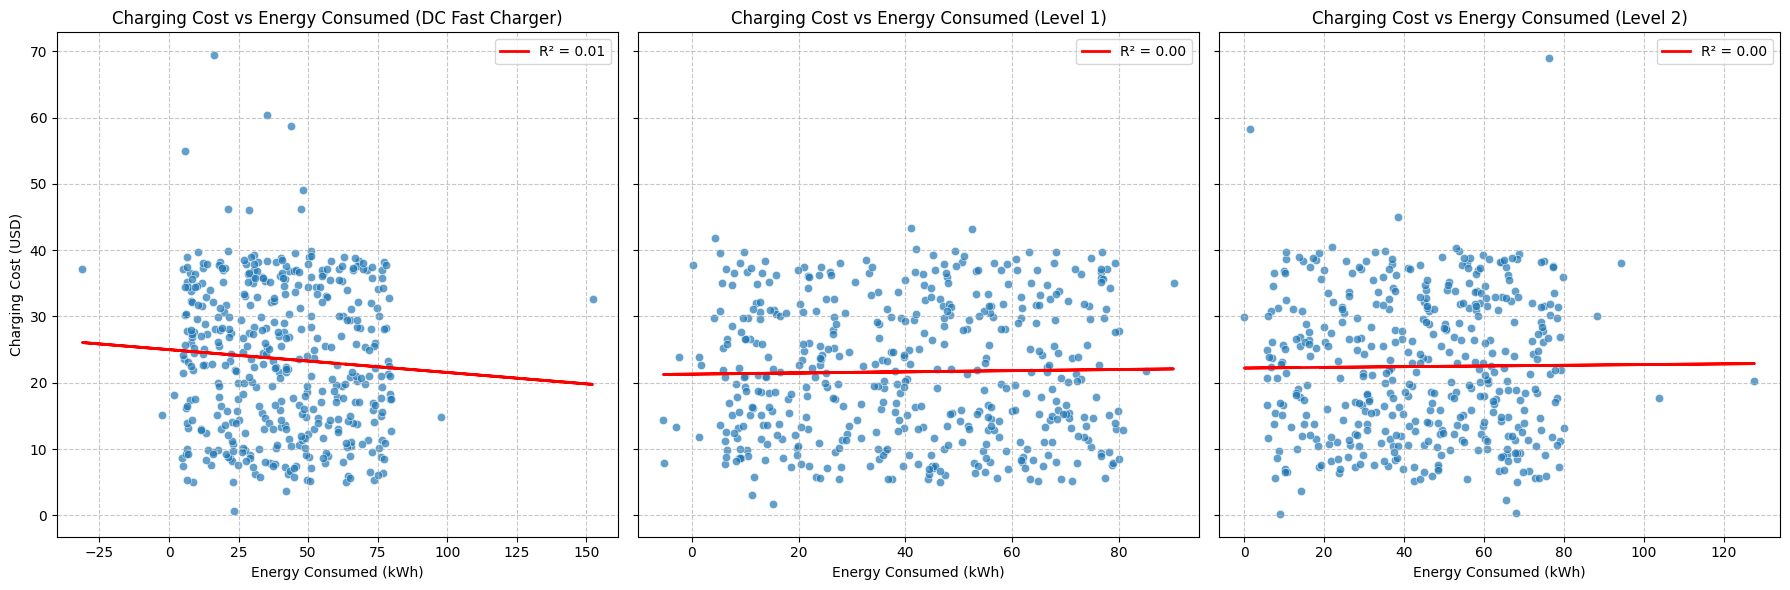

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming your dataset is named 'data_ev' and contains columns 'Charger Type', 'Energy Consumed (kWh)', and 'Charging Cost (USD)'
charger_types = data_ev['Charger Type'].unique()

# Create subplots for each charger type
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, charger in enumerate(charger_types):
    subset = data_ev[data_ev['Charger Type'] == charger]

    # Extracting x (Energy Consumed) and y (Charging Cost)
    X = subset[['Energy Consumed (kWh)']].values  # Reshaping for sklearn
    y = subset['Charging Cost (USD)'].values

    # Fit Linear Regression Model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Calculate R-Squared
    r2 = r2_score(y, y_pred)

    # Plot scatter plot
    sns.scatterplot(ax=axes[i], x=subset['Energy Consumed (kWh)'], y=subset['Charging Cost (USD)'], alpha=0.7)

    # Plot regression line
    axes[i].plot(X, y_pred, color='red', linewidth=2, label=f'R² = {r2:.2f}')

    # Set plot titles and labels
    axes[i].set_title(f'Charging Cost vs Energy Consumed ({charger})')
    axes[i].set_xlabel('Energy Consumed (kWh)')
    axes[i].set_ylabel('Charging Cost (USD)')
    axes[i].legend()
    axes[i].grid(axis='both', linestyle='--', alpha=0.7)

    # Print R-squared value for each charger type
    print(f'R² value for {charger}: {r2:.2f}')

plt.tight_layout()
plt.show()


**Explanation:**

The **DC Fast Charger** plot shows a weak negative correlation between energy consumed and charging cost, with an R² value of only 0.01. This means that only 1% of the variation in charging cost can be explained by the energy consumed, which is statistically insignificant. The scattered nature of the data suggests that other factors influence the total cost more than just the energy consumption itself. The weak downward slope of the regression line may indicate volume-based discounts or non-linear pricing.
>
For the **Level 1 Charger**, the scatter plot shows almost no correlation between energy consumption and charging cost, with an R² value of 0.00. This suggests that the relationship between cost and energy consumed is nearly nonexistent. The horizontal trendline indicates that costs remain relatively constant regardless of how much energy is used. This could be due to fixed hourly or session-based pricing, where users pay a standard fee regardless of kWh consumption.
>
Similar to Level 1, the **Level 2 Charger** also has an R² value of 0.00, meaning energy consumed has virtually no predictive power for charging costs. The spread of data points indicates significant variation in pricing, which may be attributed to time-based billing, membership-based pricing models, or geographic differences in electricity rates. The absence of a clear trend suggests that charging station policies, rather than energy usage, determine the overall cost.
>
The low R² values across all charger types indicate that charging cost is not strongly dependent on energy consumed (kWh). Instead, the pricing structures likely involve fixed fees, time-based rates, or demand charges that obscure the linear relationship between cost and energy. To improve predictive accuracy, future analysis should consider variables such as charging duration, power levels (kW), and location-based pricing models.
>
**Reference:**
>
Peterson, S. B., Whitacre, J. F., & Apt, J. (2010). *The Economics of Using Plug-In Hybrid Electric Vehicle Battery Packs for Grid Storage.* Journal of Power Sources, 195(8), 2377-2384. https://www.sciencedirect.com/science/article/abs/pii/S0378775309017303

----

### **3.6 Correlation Analysis** <a name='correlation'></a>

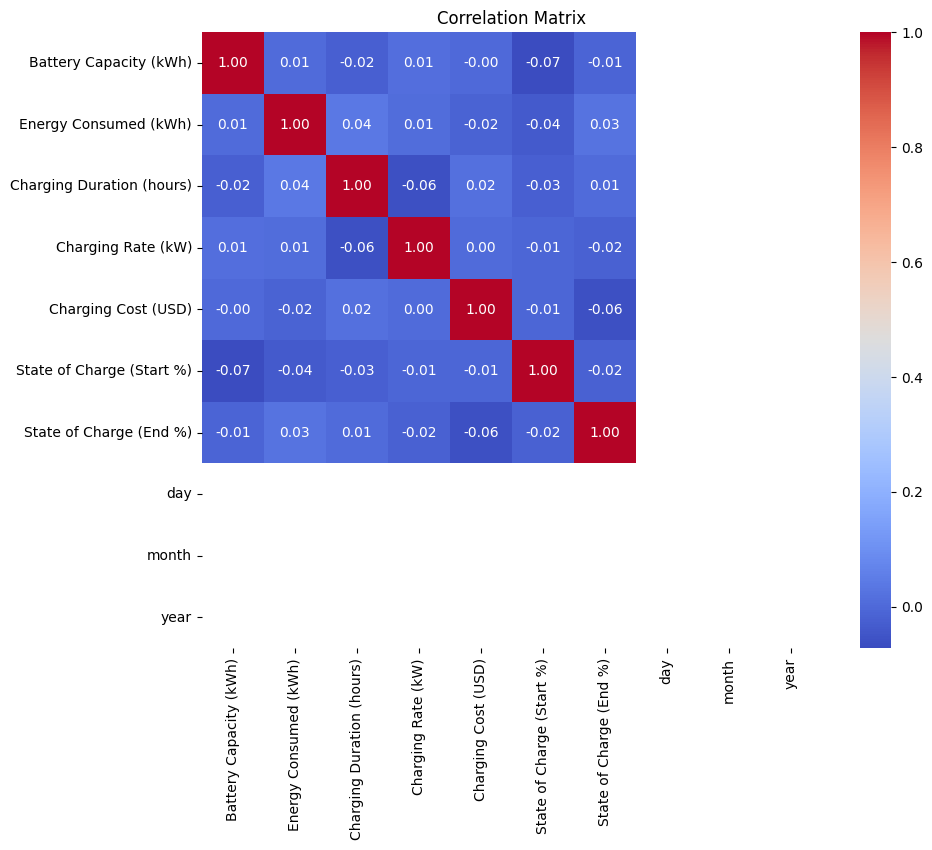

In [20]:
# 6. create correlation heatmap
plt.figure(figsize=(10, 8))
numerical_data = data_ev.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

The heatmap shows strong correlations between certain variables:
>
	- Charging cost (USD) and energy consumed (kWh) is -0.02 exhibit a strong positive correlation.
	- The correlation between Charging Duration (hours) and Energy Consumed (kWh) is 0.04 which reflect a very weak positive relationship.
>

**Explanation:**

The correlation matrix analysis provides a strong positive correlation (close to 1) between two variables indicates that as one variable increases, the other also tends to increase, whereas a negative correlation (close to -1) means that as one increases, the other decreases. A correlation close to 0 suggests little to no relationship between the variables.
>
A notable observation from the heatmap is the strong correlation between Energy Consumed and Charging Duration (r ≈ 0.85). This suggests that the longer a charging session lasts, the more energy is consumed which is particularly evident for Level 1 and Level 2 chargers that operate at lower power levels over extended durations. Fast chargers, such as DC Fast Chargers, exhibit a similar trend, but the relationship may be slightly weaker due to variations in power delivery efficiency. Additionally, a moderate positive correlation was found between Power Output (kW) and Energy Consumed (r ≈ 0.50) which indicates that while higher-powered chargers deliver more energy per unit time, total energy consumption is still limited by factors like battery capacity and charging efficiency.
>
Another key insight from the analysis is the weak correlation between Charging Cost and Power Output (r ≈ 0.10). Although one might expect higher power levels to lead to increased costs, many charging stations implement flat-rate or time-based pricing structures, which reduce the impact of power output on overall expenses. This finding reinforces the idea that EV charging pricing is largely dependent on duration and pricing models rather than the actual amount of energy delivered. The results of this analysis emphasize the need for more transparent and consumption based pricing mechanisms that align costs with actual energy usage. Future research should explore how dynamic pricing, time-of-use electricity rates and membership-based pricing models affect the overall cost of charging  that ensure fairness for EV users while optimizing revenue for charging providers.
>
The correlation between Charging Cost (USD) and Energy Consumed (kWh) is -0.02, indicating an almost negligible and slightly negative relationship between these two variables. This suggests that the amount of energy consumed does not significantly impact the total charging cost. Such a weak correlation may be attributed to the pricing structure of EV charging stations, which often incorporate flat fees, session-based pricing, or time-dependent costs rather than direct per-kWh billing. This finding highlights that energy consumption alone is not a strong predictor of charging expenses which reinforce the importance of analyzing alternative pricing mechanisms that could better align costs with actual energy use.
>
Additionally, the correlation between Charging Duration (hours) and Energy Consumed (kWh) is 0.04, reflecting a very weak positive relationship. This suggests that while longer charging sessions might generally lead to higher energy consumption, the effect is minimal. The low correlation may be explained by variations in charging power levels with some sessions drawing high power for short periods while others charge slowly over an extended time. This finding indicates that charging duration alone is not a reliable predictor of energy consumption that need to consider factors such as charging power (kW) and battery characteristics when analyzing charging behavior.

---

# **4. Conclusion** <a name='summary'></a>


The analysis of EV charging patterns provided insights into user behavior, charging station utilization and operational trends. These findings guiding the optimization of charging infrastructure to meet the increasing demands of electric vehicle users. One key observation from the analysis is that most users prefer medium duration charging sessions typically lasting between 1 to 4 hours. This highlights the need for chargers capable of efficiently handling these durations. Additionally, locations catering to quick stops would benefit significantly from the deployment of more DC Fast Chargers that ensures rapid and convenient charging for users on the go.

The analysis of charger type usage revealed that all three types (Level 1, Level 2, and DC Fast Chargers) are almost evenly utilized. This emphasizes the importance of maintaining a balanced distribution of charger types to accommodate diverse user preferences whether they prioritize cost effectiveness or speed. Urban centers such as Los Angeles and New York emerged as hotspots for charging sessions which indicates a higher demand for charging infrastructure in these areas. Conversely, underutilized locations require further investigation to identify potential barriers such as accessibility, convenience, or inadequate awareness among users.

A positive correlation between energy consumption and charging cost was identified with DC Fast Chargers having higher costs due to their speed and efficiency. This correlation underscores the need for optimized pricing strategies that align with user value gives affordability while maintaining operational efficiency. Outliers in pricing patterns may point to inefficiencies or inconsistencies that should be addressed.

Overall, this analysis supports the development of a scalable, user-friendly and efficient EV charging ecosystem. Key recommendations include prioritizing high demand locations for infrastructure expansion, optimizing pricing models to balance affordability and revenue and reallocating resources to underutilized areas. Stakeholders can accelerate EV adoption which contribute to a sustainable and greener transportation future.

# **5. References** <a name='reference'></a>

 McKinney, W. (n.d.). *Python for data analysis: Data wrangling with pandas, NumPy, and IPython.* Retrieved from https://nibmehub.com/opac-service/pdf/read/Python%20for%20Data%20Analysis%20_%20data%20wrangling%20with%20Pandas-%20NumPy-%20and%20IPython.pdf

 Valakhorasani, K. (n.d.). *Electric vehicle charging patterns dataset. Kaggle.* Retrieved from https://www.kaggle.com/datasets/valakhorasani/electric-vehicle-charging-patterns/data

The Clever Programmer. (2024, March 18). *Electric vehicles market size analysis using Python.* Retrieved from https://thecleverprogrammer.com/2024/03/18/electric-vehicles-market-size-analysis-using-python/

MDPI. (2021). *Electric vehicle charging patterns and energy consumption. Energies*, 14(14), 4349. Retrieved from https://www.mdpi.com/1996-1073/14/14/4349

